In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
#reading the csv file
import pandas as pd 
df=pd.read_csv('/content/mydrive/MyDrive/Churn_Modelling.csv')
print(df)

      RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10

In [ ]:
#preparing the explanatory variables and the dependent variable
x=df.iloc[:,3:13]
y=df['Exited']
print(x)
x.info()

      CreditScore Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0             619    France  Female  ...          1               1        101348.88
1             608     Spain  Female  ...          0               1        112542.58
2             502    France  Female  ...          1               0        113931.57
3             699    France  Female  ...          0               0         93826.63
4             850     Spain  Female  ...          1               1         79084.10
...           ...       ...     ...  ...        ...             ...              ...
9995          771    France    Male  ...          1               0         96270.64
9996          516    France    Male  ...          1               1        101699.77
9997          709    France  Female  ...          0               1         42085.58
9998          772   Germany    Male  ...          1               0         92888.52
9999          792    France  Female  ...          1              

In [ ]:
#encoding the Gender column in x 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x.iloc[:,2]=label_encoder.fit_transform(x.iloc[:,2])
print(x)

      CreditScore Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0             619    France       0  ...          1               1        101348.88
1             608     Spain       0  ...          0               1        112542.58
2             502    France       0  ...          1               0        113931.57
3             699    France       0  ...          0               0         93826.63
4             850     Spain       0  ...          1               1         79084.10
...           ...       ...     ...  ...        ...             ...              ...
9995          771    France       1  ...          1               0         96270.64
9996          516    France       1  ...          1               1        101699.77
9997          709    France       0  ...          0               1         42085.58
9998          772   Germany       1  ...          1               0         92888.52
9999          792    France       0  ...          1              

In [ ]:
#One hot encoding the Geography in x
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
Ohe=OneHotEncoder()
ct=ColumnTransformer([('encoder',Ohe,[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x),dtype=np.float)
x=pd.DataFrame(x)
print(x)

       0    1    2      3    4   ...         7    8    9    10         11
0     1.0  0.0  0.0  619.0  0.0  ...       0.00  1.0  1.0  1.0  101348.88
1     0.0  0.0  1.0  608.0  0.0  ...   83807.86  1.0  0.0  1.0  112542.58
2     1.0  0.0  0.0  502.0  0.0  ...  159660.80  3.0  1.0  0.0  113931.57
3     1.0  0.0  0.0  699.0  0.0  ...       0.00  2.0  0.0  0.0   93826.63
4     0.0  0.0  1.0  850.0  0.0  ...  125510.82  1.0  1.0  1.0   79084.10
...   ...  ...  ...    ...  ...  ...        ...  ...  ...  ...        ...
9995  1.0  0.0  0.0  771.0  1.0  ...       0.00  2.0  1.0  0.0   96270.64
9996  1.0  0.0  0.0  516.0  1.0  ...   57369.61  1.0  1.0  1.0  101699.77
9997  1.0  0.0  0.0  709.0  0.0  ...       0.00  1.0  0.0  1.0   42085.58
9998  0.0  1.0  0.0  772.0  1.0  ...   75075.31  2.0  1.0  0.0   92888.52
9999  1.0  0.0  0.0  792.0  0.0  ...  130142.79  1.0  1.0  0.0   38190.78

[10000 rows x 12 columns]


In [ ]:
#droping one columns of the one hot encoding array because they are correlated
x=x.iloc[:,1:]
print(x)

       1    2      3    4     5     6          7    8    9    10         11
0     0.0  0.0  619.0  0.0  42.0   2.0       0.00  1.0  1.0  1.0  101348.88
1     0.0  1.0  608.0  0.0  41.0   1.0   83807.86  1.0  0.0  1.0  112542.58
2     0.0  0.0  502.0  0.0  42.0   8.0  159660.80  3.0  1.0  0.0  113931.57
3     0.0  0.0  699.0  0.0  39.0   1.0       0.00  2.0  0.0  0.0   93826.63
4     0.0  1.0  850.0  0.0  43.0   2.0  125510.82  1.0  1.0  1.0   79084.10
...   ...  ...    ...  ...   ...   ...        ...  ...  ...  ...        ...
9995  0.0  0.0  771.0  1.0  39.0   5.0       0.00  2.0  1.0  0.0   96270.64
9996  0.0  0.0  516.0  1.0  35.0  10.0   57369.61  1.0  1.0  1.0  101699.77
9997  0.0  0.0  709.0  0.0  36.0   7.0       0.00  1.0  0.0  1.0   42085.58
9998  1.0  0.0  772.0  1.0  42.0   3.0   75075.31  2.0  1.0  0.0   92888.52
9999  0.0  0.0  792.0  0.0  28.0   4.0  130142.79  1.0  1.0  0.0   38190.78

[10000 rows x 11 columns]


In [ ]:
#build the ANN model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
model=Sequential()
model.add(Dense(6,activation='relu',input_shape=(11,),kernel_initializer='uniform'))
model.add(Dense(6,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

In [ ]:
#staderdize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)



In [ ]:
#training the model and splitting the data at the same step !
history=model.fit(x,y,epochs=100,batch_size=10,validation_split=0.2)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5916 - accuracy: 0.7937 - val_loss: 0.4307 - val_accuracy: 0.8050
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4208 - accuracy: 0.7981 - val_loss: 0.4259 - val_accuracy: 0.8050
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 0.8043 - val_loss: 0.4207 - val_accuracy: 0.8270
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4036 - accuracy: 0.8373 - val_loss: 0.4163 - val_accuracy: 0.8330
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4139 - accuracy: 0.8296 - val_loss: 0.4120 - val_accuracy: 0.8335
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4071 - accuracy: 0.8334 - val_loss: 0.4107 - val_accuracy: 0.8310
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4009 - accuracy: 0.8379 - val_loss: 0.4070 - val_accuracy: 0.8340

<function matplotlib.pyplot.show>

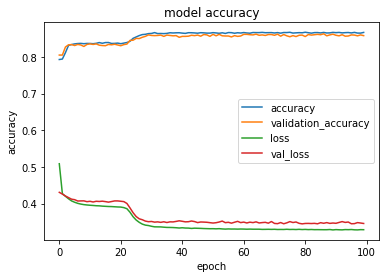

In [ ]:
#ploting the training accuracy and loss vs the validation loss and accuracy 
from matplotlib import pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy','validation_accuracy','loss','val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show

In [ ]:
!